In [1]:
# 导入需要的模块
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 共有212页数据，爬取4229只股票
page = 213

for i in list(range(1,page)):
    # 指定连线，在开发者模式下找到
    url = r'http://59.push2.eastmoney.com/api/qt/clist/get?cb=jQuery1124031493509477667003_1605691890891&pn='+ str(i)+'&pz=20&po=1&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fltt=2&invt=2&fid=f3&fs=m:0+t:6,m:0+t:13,m:0+t:80,m:1+t:2,m:1+t:23&fields=f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f12,f13,f14,f15,f16,f17,f18,f20,f21,f23,f24,f25,f22,f11,f62,f128,f136,f115,f152&_=1605691890892'
    # 定义请求头
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}
    # 获取数据
    html = requests.get(url, headers = headers)
    # 提取json数据
    jsons = html.text[43:-2]
    # 将正确的Str格式转化为json格式
    text_json = json.loads(jsons)
    # 利用pandas储存数据到excel
    df = pd.DataFrame((text_json['data']['diff']))
    #df.to_excel(r'E:/Data_Scientist/Python_files/笔试项目/EasyMoney_Page'+ str(i)+'.xlsx')
    df.to_excel(r'./EasyMoney_Page'+ str(i)+'.xlsx')

In [3]:
import glob

# 读取下载的全部表格
paths = glob.glob('*.xlsx')
#print(paths,'\n')

# 全部写在一起
df = pd.DataFrame()
for path in paths:
    df_ = pd.read_excel(path)
    df = pd.concat([df,df_])

print("A股共有",len(df),"只股票。")

# A股全部股票保存在data.xlsx 文件中
df.to_excel(r'.\All_stocks.xlsx',index = False)

A股共有 4237 只股票。


### 读取数据进行简单分析

In [4]:
# 读取数据并做简单分析
df = pd.read_excel(r'.\All_stocks.xlsx')

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

# 显示前十列和所有的行
df.head(5)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f20,f21,f22,f23,f24,f25,f62,f115,f128,f140,f141,f136,f152
0,0,2,44.83,44.01,13.7,2194,9793182,24,0.77,35.47,-,0,605177,1,N东亚,44.83,37.36,37.36,31.13,5092688000,1273172000,0,2.96,44.01,44.01,8768658,34.89,-,-,-,-,2
1,1,2,35.22,20,5.87,302997,995684688,23.99,37.65,487.83,2.07,0,300713,0,英可瑞,35.22,28.18,28.18,29.35,5051868750,2834130789,0,7.18,136.22,155.96,84929983,-266.93,-,-,-,-,2
2,2,2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,0,300711,0,广哈通信,22.76,18.61,18.98,18.97,4725935835,4699191924,0,8.34,70.87,91.42,93946919,124.15,-,-,-,-,2
3,3,2,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,0.28,300730,0,科创信息,19.37,16.68,16.69,16.15,2879002356,1523714777,0,6.97,22.11,27,18755772,109.07,-,-,-,-,2
4,4,2,120.7,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,1.09,688777,1,中控技术,127.55,107.07,108.01,108.63,59298703000,4711269099,1.17,15.8,237.81,237.81,89225600,152.27,-,-,-,-,2


In [5]:
# 复制原数据进行分析
data = df.copy()
data.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f20,f21,f22,f23,f24,f25,f62,f115,f128,f140,f141,f136,f152
0,0,2,44.83,44.01,13.7,2194,9793182,24,0.77,35.47,-,0,605177,1,N东亚,44.83,37.36,37.36,31.13,5092688000,1273172000,0,2.96,44.01,44.01,8768658,34.89,-,-,-,-,2
1,1,2,35.22,20,5.87,302997,995684688,23.99,37.65,487.83,2.07,0,300713,0,英可瑞,35.22,28.18,28.18,29.35,5051868750,2834130789,0,7.18,136.22,155.96,84929983,-266.93,-,-,-,-,2
2,2,2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,0,300711,0,广哈通信,22.76,18.61,18.98,18.97,4725935835,4699191924,0,8.34,70.87,91.42,93946919,124.15,-,-,-,-,2
3,3,2,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,0.28,300730,0,科创信息,19.37,16.68,16.69,16.15,2879002356,1523714777,0,6.97,22.11,27,18755772,109.07,-,-,-,-,2
4,4,2,120.7,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,1.09,688777,1,中控技术,127.55,107.07,108.01,108.63,59298703000,4711269099,1.17,15.8,237.81,237.81,89225600,152.27,-,-,-,-,2


In [6]:
# 在开发者模式找到每一列对应的具体意思
columns = {"f2":"最新价",
            "f3":"涨跌幅（%）",
            "f4":"涨跌额",
            "f5":"成交量（手）",
            "f6":"成交额",
            "f7":"振幅（%）",
            "f8":"换手率（%）",
            "f9":"市盈率（动态）",
            "f10":"量比",
            "f12":"代码",
            "f14":"名称",
            "f15":"最高价",
            "f16":"最低价",
            "f17":"今天开盘",
            "f18":"昨天收盘",
            "f23":"市净率"}
data.rename(columns=columns, inplace=True)

data.head(5)

,Unnamed: 0,f1,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,f11,代码,f13,名称,最高价,最低价,今天开盘,昨天收盘,f20,f21,f22,市净率,f24,f25,f62,f115,f128,f140,f141,f136,f152
0,0,2,44.83,44.01,13.7,2194,9793182,24,0.77,35.47,-,0,605177,1,N东亚,44.83,37.36,37.36,31.13,5092688000,1273172000,0,2.96,44.01,44.01,8768658,34.89,-,-,-,-,2
1,1,2,35.22,20,5.87,302997,995684688,23.99,37.65,487.83,2.07,0,300713,0,英可瑞,35.22,28.18,28.18,29.35,5051868750,2834130789,0,7.18,136.22,155.96,84929983,-266.93,-,-,-,-,2
2,2,2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,0,300711,0,广哈通信,22.76,18.61,18.98,18.97,4725935835,4699191924,0,8.34,70.87,91.42,93946919,124.15,-,-,-,-,2
3,3,2,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,0.28,300730,0,科创信息,19.37,16.68,16.69,16.15,2879002356,1523714777,0,6.97,22.11,27,18755772,109.07,-,-,-,-,2
4,4,2,120.7,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,1.09,688777,1,中控技术,127.55,107.07,108.01,108.63,59298703000,4711269099,1.17,15.8,237.81,237.81,89225600,152.27,-,-,-,-,2


In [7]:
# 删除没有用到的数据
data = data.drop(['Unnamed: 0', 'f1', 'f11', 'f13', 'f20', 'f21','f22','f24','f25','f62','f115','f128','f140','f141','f136','f152'], axis=1)

data.head(5)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
0,44.83,44.01,13.7,2194,9793182,24,0.77,35.47,-,605177,N东亚,44.83,37.36,37.36,31.13,2.96
1,35.22,20,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18
2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,300711,广哈通信,22.76,18.61,18.98,18.97,8.34
3,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,300730,科创信息,19.37,16.68,16.69,16.15,6.97
4,120.7,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,688777,中控技术,127.55,107.07,108.01,108.63,15.8


In [8]:
# 抓取到股票的数量
data['名称'].count()

4237

In [9]:
# “最新价”和“量比”两列存在 '-'，找到并且删除
data = data[data['最新价'] != '-']
data = data[data['量比'] != '-']

In [10]:
# 目前共剩下4064只股票，共有16个指标
data.shape

(4063, 16)

In [11]:
# 将数据转换成正确的格式以供之后分析
data['最新价'] = pd.to_numeric(data['最新价'])
data['涨跌幅（%）'] = pd.to_numeric(data['涨跌幅（%）'])
data['涨跌额'] = pd.to_numeric(data['涨跌额'])
data['成交量（手）'] = pd.to_numeric(data['成交量（手）'])
data['成交额'] = pd.to_numeric(data['成交额'])
data['振幅（%）'] = pd.to_numeric(data['振幅（%）'])
data['换手率（%）'] = pd.to_numeric(data['换手率（%）'])
data['市盈率（动态）'] = pd.to_numeric(data['市盈率（动态）'])
data['量比'] = pd.to_numeric(data['量比'])
data['最高价'] = pd.to_numeric(data['最高价'])
data['最低价'] = pd.to_numeric(data['最低价'])
data['今天开盘'] = pd.to_numeric(data['今天开盘'])
data['昨天收盘'] = pd.to_numeric(data['昨天收盘'])
data['市净率'] = pd.to_numeric(data['市净率'])
data['代码'] = pd.to_numeric(data['代码'])

In [12]:
# 所有的数据都是numeric类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4063 entries, 1 to 4236
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   最新价      4063 non-null   float64
 1   涨跌幅（%）   4063 non-null   float64
 2   涨跌额      4063 non-null   float64
 3   成交量（手）   4063 non-null   int64  
 4   成交额      4063 non-null   int64  
 5   振幅（%）    4063 non-null   float64
 6   换手率（%）   4063 non-null   float64
 7   市盈率（动态）  4063 non-null   float64
 8   量比       4063 non-null   float64
 9   代码       4063 non-null   int64  
 10  名称       4063 non-null   object 
 11  最高价      4063 non-null   float64
 12  最低价      4063 non-null   float64
 13  今天开盘     4063 non-null   float64
 14  昨天收盘     4063 non-null   float64
 15  市净率      4063 non-null   float64
dtypes: float64(12), int64(3), object(1)
memory usage: 539.6+ KB


In [13]:
# 基本统计特征
data.describe()

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,最高价,最低价,今天开盘,昨天收盘,市净率
count,4063.000000,4063.000000,4063.000000,4.063000e+03,4.063000e+03,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000
mean,22.926611,-1.299412,-0.401703,1.698195e+05,2.124134e+08,3.767482,2.870116,62.767135,1.167805,329416.952990,23.693795,22.697558,23.347814,23.328314,4.323111
std,46.714418,2.463258,1.560862,3.664880e+05,4.624596e+08,2.172282,4.358472,723.347763,1.671270,269612.627477,48.243148,46.348944,47.717198,47.729763,15.911455
min,0.220000,-20.020000,-36.620000,1.278000e+03,5.758720e+05,0.000000,0.040000,-36658.980000,0.130000,1.000000,0.220000,0.220000,0.220000,0.240000,-557.040000
25%,6.085000,-2.510000,-0.380000,2.694600e+04,3.497420e+07,2.345000,0.780000,14.545000,0.790000,2574.500000,6.250000,6.040000,6.170000,6.150000,1.710000
50%,11.260000,-1.380000,-0.120000,6.541400e+04,8.012742e+07,3.260000,1.540000,33.070000,0.990000,300613.000000,11.600000,11.120000,11.430000,11.400000,2.840000
75%,23.665000,-0.290000,-0.020000,1.687465e+05,2.115584e+08,4.565000,3.090000,68.825000,1.280000,600885.500000,24.240000,23.500000,24.000000,23.975000,4.740000
max,1726.880000,20.000000,14.300000,9.034193e+06,1.073275e+10,23.990000,54.950000,10072.460000,97.940000,689009.000000,1768.880000,1724.000000,1761.500000,1763.500000,478.560000


### Q1：哪一只股票涨跌幅度最大？

In [14]:
# 涨跌百分比最大的股票
data[data['涨跌幅（%）'] == data['涨跌幅（%）'].max()]

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
1,35.22,20.0,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18


### Q2: 涨跌额幅度最大的股票？

In [15]:
# 涨跌额度最大的股票
data[data['涨跌额'] == data['涨跌额'].max()]

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
2697,181.3,8.56,14.3,72438,1286938576,11.2,28.63,136.32,1.95,605111,新洁能,183.7,165.0,168.02,167.0,16.36


### Q3： 涨跌幅度最大的前五只股票

In [16]:
# 先对股票按照涨跌幅排序，然后选取涨跌幅度百分比最大的五只股票
data.sort_values(by = '涨跌幅（%）', axis=0, ascending=False).head(5)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
1,35.22,20.00,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18
2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,300711,广哈通信,22.76,18.61,18.98,18.97,8.34
3,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,300730,科创信息,19.37,16.68,16.69,16.15,6.97
4,120.70,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,688777,中控技术,127.55,107.07,108.01,108.63,15.80
5,22.15,10.31,2.07,106822,230016949,11.90,12.51,33.12,4.66,300501,海顺新材,22.29,19.90,20.08,20.08,4.45


### Q4：所有股票涨跌幅度的均值？

In [17]:
# 涨跌幅均值
data['涨跌幅（%）'].mean()

-1.2994117647058818

### Q5：所有股票涨跌幅度的中值？

In [18]:
# 涨跌幅中值
data['涨跌幅（%）'].median()

-1.38

### Q6: 涨跌幅度可视化

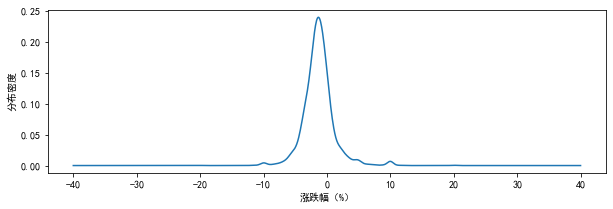

In [19]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

data['涨跌幅（%）'].plot(kind='density', figsize=(10,3))
plt.xlabel('涨跌幅（%）')
plt.ylabel('分布密度')
plt.show()

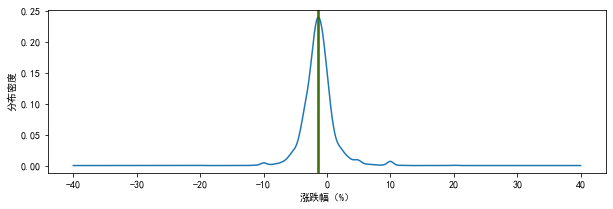

In [20]:
ax = data['涨跌幅（%）'].plot(kind='density', figsize=(10,3)) # kde
ax.axvline(data['涨跌幅（%）'].mean(), color='red')
ax.axvline(data['涨跌幅（%）'].median(), color='green')

plt.xlabel('涨跌幅（%）')
plt.ylabel('分布密度')
plt.show()

### Q7: 涨跌额度最大的股票（结果与百分比不同）

In [21]:
# 涨跌额最大的股票
data[data['涨跌额'] == data['涨跌额'].max()]

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
2697,181.3,8.56,14.3,72438,1286938576,11.2,28.63,136.32,1.95,605111,新洁能,183.7,165.0,168.02,167.0,16.36


### Q8: 按照涨跌额排序，选取涨跌额最大的前五个

In [22]:
data.sort_values(by = '涨跌额', axis=0, ascending= False).head(5)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
2697,181.30,8.56,14.30,72438,1286938576,11.20,28.63,136.32,1.95,605111,新洁能,183.70,165.00,168.02,167.00,16.36
11,144.43,10.02,13.15,124455,1729755616,17.38,32.29,84.52,1.75,300869,康泰医学,150.01,127.20,129.61,131.28,39.44
4,120.70,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,688777,中控技术,127.55,107.07,108.01,108.63,15.80
2237,71.00,9.52,6.17,110825,793244032,11.37,46.67,134.16,1.91,300890,翔丰华,74.47,67.10,67.10,64.83,6.97
1,35.22,20.00,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18


### Q9：创业板共有多少只股票？

In [23]:
# 创业板股票：30开头
data_chuangye = data[data['代码'].apply(lambda x:str(x)[:2]) == '30']

data_chuangye.head()

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
1,35.22,20.00,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18
2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,300711,广哈通信,22.76,18.61,18.98,18.97,8.34
3,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,300730,科创信息,19.37,16.68,16.69,16.15,6.97
5,22.15,10.31,2.07,106822,230016949,11.90,12.51,33.12,4.66,300501,海顺新材,22.29,19.90,20.08,20.08,4.45
11,144.43,10.02,13.15,124455,1729755616,17.38,32.29,84.52,1.75,300869,康泰医学,150.01,127.20,129.61,131.28,39.44


In [24]:
# 创业板股票数量
data_chuangye.count()

最新价        896
涨跌幅（%）     896
涨跌额        896
成交量（手）     896
成交额        896
振幅（%）      896
换手率（%）     896
市盈率（动态）    896
量比         896
代码         896
名称         896
最高价        896
最低价        896
今天开盘       896
昨天收盘       896
市净率        896
dtype: int64

### Q10: 科创板共有多少只股票？

In [25]:
# 科创板股票开头688
data_kechuang = data[data['代码'].apply(lambda x:str(x)[:3]) == '688']

data_kechuang.head()

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
4,120.70,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,688777,中控技术,127.55,107.07,108.01,108.63,15.80
25,66.90,2.72,1.77,22467,150619389,5.76,7.75,50.75,1.32,688123,聚辰股份,68.52,64.77,65.55,65.13,5.70
92,20.49,-1.21,-0.25,8931,18332560,2.22,0.58,69.83,0.85,688389,普门科技,20.82,20.36,20.77,20.74,7.92
118,56.77,-1.24,-0.71,1886,10758615,1.32,1.24,126.44,1.04,688228,开普云,57.48,56.72,57.03,57.48,3.37
144,59.50,-1.26,-0.76,1563,9347393,2.14,1.22,157.68,0.76,688004,博汇科技,60.79,59.50,60.79,60.26,4.95


In [26]:
# 科创板股票数量
data_kechuang.count()

最新价        197
涨跌幅（%）     197
涨跌额        197
成交量（手）     197
成交额        197
振幅（%）      197
换手率（%）     197
市盈率（动态）    197
量比         197
代码         197
名称         197
最高价        197
最低价        197
今天开盘       197
昨天收盘       197
市净率        197
dtype: int64

### Q11：量比是衡量相对成交量的指标，指股市开市后平均每分钟的成交量与过去5个交易日平均每分钟成交量之比。

In [27]:
# 量比高说明买的量比卖的量大，表示买盘大量涌入。
#当股价在底部量比大，说明有大资金买入，股价往往上涨。
#如果股价在高位，某一天早盘量比突然特别大，要注意了，往往是主力诱多出货，随着股价极速上升，量比也快速减少，那往往代表股价触顶进入下跌区间。

data.sort_values(by = '量比', ascending=False).head(5)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
15,40.37,10.00,3.67,228063,902516448,9.13,54.95,31.54,97.94,605068,明新旭腾,40.37,37.02,40.37,36.70,4.07
2505,0.22,-8.33,-0.02,26176,575872,0.00,0.09,-0.59,15.34,939,凯迪退,0.22,0.22,0.22,0.24,-0.24
4027,2.45,2.94,0.07,1122405,290215264,7.56,13.61,-22.02,13.78,809,铁岭新城,2.62,2.44,2.56,2.38,0.66
2231,9.16,9.96,0.83,491998,436598416,9.24,12.96,-100.93,9.26,2786,银宝山新,9.16,8.39,8.68,8.33,4.05
2235,2.13,9.79,0.19,2202657,463406640,8.25,1.83,130.89,7.42,600871,石化油服,2.13,1.97,1.97,1.94,5.50


D:\Users\wang\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


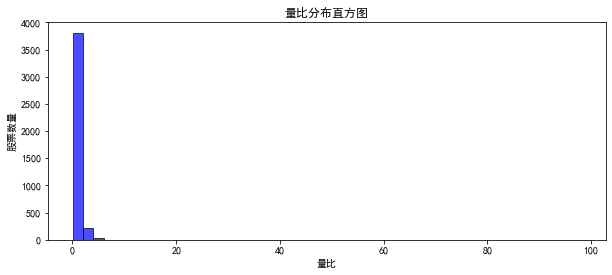

In [28]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=(10,4))
plt.hist(data['量比'], bins=50, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

plt.xlabel("量比")
plt.ylabel("股票数量")
plt.title("量比分布直方图")

plt.show()

### Q12: 市净率指的是每股股价与每股净资产的比率，可用于股票投资分析。一般来说市净率较低的股票，投资价值较高，相反，则投资价值较低。市净率为负说明这家公司的净资产是负数，如果为负数，则指标失真，可以参照其它指标对公司基本面进行判断。

In [29]:
data.sort_values(by='市净率', ascending=False).head(5)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率
3870,8.50,-0.82,-0.07,76856,65360548,4.78,3.67,-23.68,0.86,300312,邦讯技术,8.71,8.30,8.57,8.57,478.56
4106,2.90,-1.02,-0.03,23133,6714984,2.05,0.29,-78.47,0.79,2306,ST云网,2.94,2.88,2.93,2.93,445.74
2676,12.17,0.50,0.06,6829,8234004,1.82,0.22,-813.50,2.73,504,ST生物,12.20,11.98,12.14,12.11,254.18
326,2.76,-1.43,-0.04,11638,3227425,1.79,0.22,-319.50,0.89,600870,ST厦华,2.81,2.76,2.81,2.80,208.33
1493,3.69,-2.64,-0.10,86776,32420978,3.96,1.26,83.69,0.76,2069,獐子岛,3.83,3.68,3.80,3.79,151.17


### Q13: 利用换手率和成交量，可以计算出发行总股本（手）—  换手率=成交量/发行总股数（手）×100%

In [30]:
data['发行总股本（手）'] = data['成交量（手）'] / data['换手率（%）']

data.head(10)

,最新价,涨跌幅（%）,涨跌额,成交量（手）,成交额,振幅（%）,换手率（%）,市盈率（动态）,量比,代码,名称,最高价,最低价,今天开盘,昨天收盘,市净率,发行总股本（手）
1,35.22,20.00,5.87,302997,995684688,23.99,37.65,487.83,2.07,300713,英可瑞,35.22,28.18,28.18,29.35,7.18,8047.729084
2,22.76,19.98,3.79,265640,565946688,21.88,12.87,-1985.76,2.38,300711,广哈通信,22.76,18.61,18.98,18.97,8.34,20640.248640
3,18.06,11.83,1.91,210793,383292512,16.66,24.98,-236.76,6.42,300730,科创信息,19.37,16.68,16.69,16.15,6.97,8438.470777
4,120.70,11.11,12.07,187965,2224549024,18.85,48.16,183.99,0.61,688777,中控技术,127.55,107.07,108.01,108.63,15.80,3902.927741
5,22.15,10.31,2.07,106822,230016949,11.90,12.51,33.12,4.66,300501,海顺新材,22.29,19.90,20.08,20.08,4.45,8538.928857
6,11.83,10.05,1.08,341913,398954704,9.67,10.46,15.41,2.24,600731,湖南海利,11.83,10.79,10.85,10.75,3.05,32687.667304
7,12.72,10.03,1.16,77954,97230770,10.90,3.82,-86.61,4.57,603602,纵横通信,12.72,11.46,11.64,11.56,3.85,20406.806283
8,13.05,10.03,1.19,115186,146534753,11.13,3.01,89.77,0.66,2331,皖通科技,13.05,11.73,11.88,11.86,2.44,38267.774086
9,19.31,10.03,1.76,117848,220785355,13.45,9.72,255.65,2.98,2865,钧达股份,19.31,16.95,17.20,17.55,2.81,12124.279835
10,19.64,10.03,1.79,406130,773166384,8.07,4.35,-25.60,1.22,601127,小康股份,19.64,18.20,18.20,17.85,4.28,93363.218391
